# Exploracion de los datos


In [1]:
import sys
import os

# Agregar el directorio raíz del proyecto al path de Python
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

%load_ext autoreload
%autoreload 2

In [63]:
# Agregar el directorio raíz al path de Python
if project_root not in sys.path:
    sys.path.append(project_root)

# Importar la clase DataAnalyzer
from src.data.data_analyzer import DataAnalyzer

# Crear una instancia de DataAnalyzer con la ruta absoluta
csv_path = os.path.join(project_root, 'data', 'raw', 'new_items_dataset.csv')
analyzer = DataAnalyzer(csv_path)

# Cargar y mostrar los datos
df = analyzer.read_dataset()
df.head()


2025-07-02 17:32:18,968 - INFO - Leyendo dataset desde c:\Users\Milara\Desktop\github\meli-challenge\data\raw\new_items_dataset.csv
c:\Users\Milara\Desktop\github\meli-challenge\src\data\data_analyzer.py:42: DtypeWarning: Columns (10,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.file_path)
2025-07-02 17:32:22,401 - INFO - Dataset cargado exitosamente. Shape: (100000, 26)


,id,title,date_created,base_price,price,category_id,tags,attributes,variations,pictures,...,shipping_mode,shipping_admits_pickup,shipping_is_free,status,sub_status,warranty,is_new,initial_quantity,sold_quantity,available_quantity
0,MLA578569012,Escritorio Secretter Espectacular,2015-09-08T21:17:57.000Z,6700.0,6700.0,MLA1902,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,custom,True,False,active,NaN,NaN,0,1.0,0.0,1.0
1,MLA576883746,Stassen Espatulas Milenio Numero 3 Codigo 590-3,2015-08-29T12:55:03.000Z,119.0,119.0,MLA3530,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,not_specified,False,False,active,NaN,Sí,1,19.0,0.0,19.0
2,MLA581002506,Charm Britania Plata 925 Ovalado!!! Armá La Tu...,2015-09-23T12:41:07.000Z,450.0,450.0,MLA6440,['dragged_bids_and_visits'],[],[],"[{'size': '312x308', 'secure_url': 'https://a2...",...,me2,False,False,active,NaN,Sí,1,2.0,0.0,2.0
3,MLA574707083,El Hombre De Magallanes Virginia Carreño Novela,2015-08-16T13:34:01.000Z,40.0,40.0,MLA2044,['dragged_bids_and_visits'],[],[],"[{'size': '375x500', 'secure_url': 'https://a2...",...,me2,True,False,active,NaN,Sí,0,1.0,0.0,1.0
4,MLA576209717,Molde Placa Boca Espejo Bota Labial Chupetin P...,2015-08-25T14:42:20.000Z,30.0,30.0,MLA34294,['dragged_bids_and_visits'],[],[],"[{'size': '396x500', 'secure_url': 'https://a2...",...,not_specified,True,False,active,NaN,NaN,1,1.0,1.0,1.0


In [3]:
# Obtener resumen estadístico
stats = analyzer.get_statistical_summary()
print("\nResumen estadístico de precios sin descuento:")
print(stats['base_price']['summary'])
print("\nResumen estadístico de precios con descuento:")
print(stats['price']['summary'])
print("\nResumen estadístico de cantidades vendidas:")
print(stats['sold_quantity']['summary'])


2025-07-02 07:36:00,244 - INFO - Resumen estadístico generado



Resumen estadístico de precios sin descuento:
{'count': 99996.0, 'mean': 55067.92788971559, 'std': 8632656.343521312, 'min': 0.84, '25%': 90.0, '50%': 250.0, '75%': 800.0, 'max': 2222222222.0}

Resumen estadístico de precios con descuento:
{'count': 99992.0, 'mean': 52528.45696915754, 'std': 8623472.099191543, 'min': 0.84, '25%': 90.0, '50%': 250.0, '75%': 800.0, 'max': 2222222222.0}

Resumen estadístico de cantidades vendidas:
{'count': 99996.0, 'mean': 2.3971158846353853, 'std': 42.68592683425881, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 8676.0}


In [4]:

# Manejar valores faltantes
df_clean = analyzer.handle_missing_values()


2025-07-02 07:04:16,663 - INFO - Valores faltantes por columna:
id                            4
title                         4
date_created                  4
base_price                    4
price                         8
category_id                   4
tags                          4
attributes                    4
variations                    4
pictures                      4
seller_id                     4
seller_country                7
seller_province               7
seller_city                   8
seller_loyalty                4
buying_mode                   4
shipping_mode                 4
shipping_admits_pickup        4
shipping_is_free              4
status                        4
sub_status                99014
warranty                  60894
initial_quantity              4
sold_quantity                 4
available_quantity            4
dtype: int64
2025-07-02 07:04:17,109 - INFO - Valores faltantes gestionados


In [64]:
# Eliminar la columna sub_status porque el 99% son valores nulos

# Modo estricto (por defecto)
analyzer.remove_columns(['sub_status'])

2025-07-02 17:34:52,061 - INFO - Columnas eliminadas: 1 de 26 (3.85% del total)
2025-07-02 17:34:52,061 - INFO - Columnas eliminadas: ['sub_status']


2025-07-02 17:39:57,977 - INFO - Gráfico temporal generado. Registros totales: 99992, Días mostrados: 61


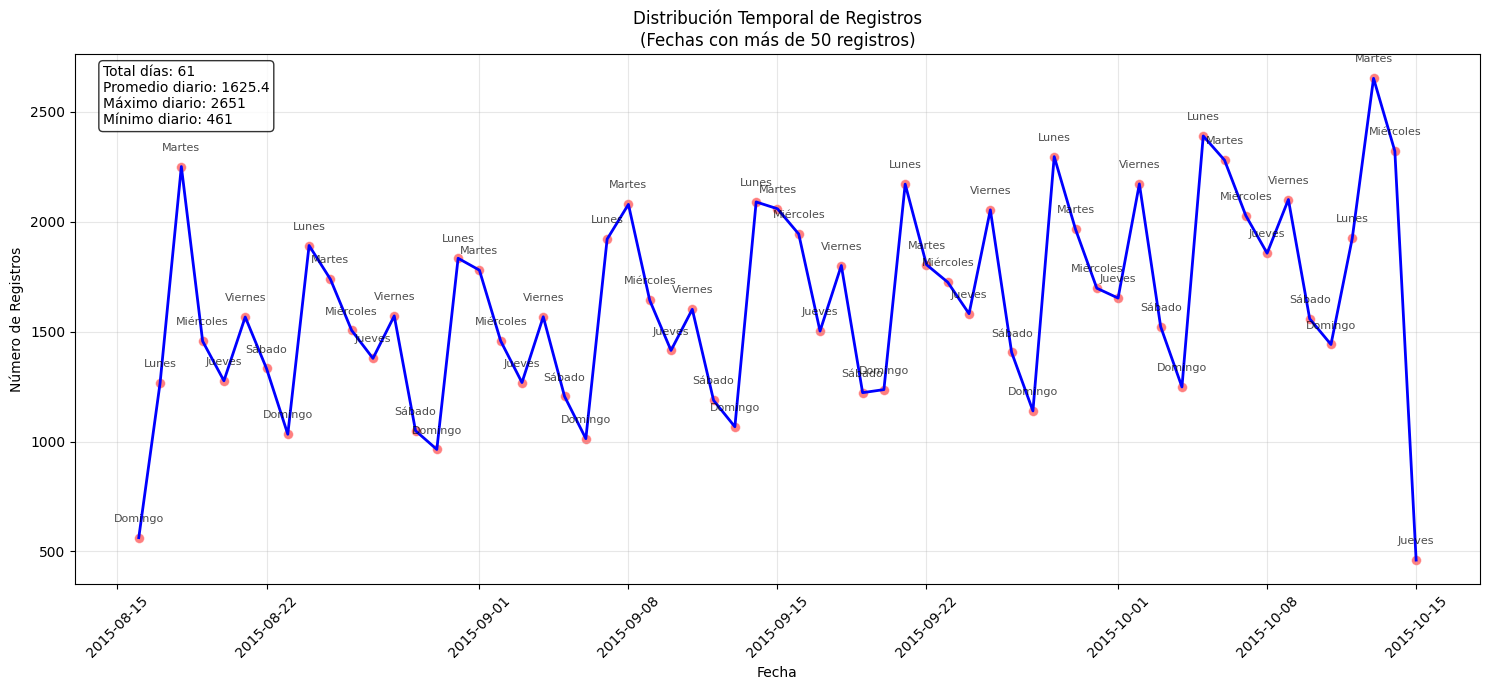

In [72]:
# Se checa que la fecha tenga sentido, para hacer esto se tuvieron que quitar valores que no se podian convertir a datetime y aquellas fechas que tenina menos de 50 registros
analyzer.plot_temporal_distribution(threshold=50)

In [73]:
# Se eliminan los registros que no tienen fecha y las fechas que tienen menos de 50 registros
analyzer.clean_dates_by_frequency()


2025-07-02 17:43:35,896 - INFO - Limpieza de fechas completada:
- Filas con fechas inválidas eliminadas: 8 (0.01% del total)
- Filas eliminadas por baja frecuencia: 842 (0.84% del total)
- Total de filas eliminadas: 850 (0.85% del total)
2025-07-02 17:43:35,943 - INFO - Fechas únicas restantes: 61
Promedio de registros por fecha: 1625.4


In [74]:
# Detectar outliers en precios sin descuento
outliers_mask, outliers = analyzer.detect_outliers(column='base_price', method='iqr')

2025-07-02 17:43:52,903 - INFO - Detectados 14089 outliers usando método iqr


In [75]:
# Detectar outliers en precios con descuento
outliers_mask, outliers = analyzer.detect_outliers(column='price', method='iqr')

2025-07-02 17:43:53,643 - INFO - Detectados 14090 outliers usando método iqr


In [76]:
# Detectar outliers en precios
outliers_mask, outliers = analyzer.detect_outliers(column='sold_quantity', method='iqr')

2025-07-02 17:43:54,345 - INFO - Detectados 16794 outliers usando método iqr


2025-07-02 17:44:07,803 - INFO - Generados 6 histogramas para las columnas numéricas


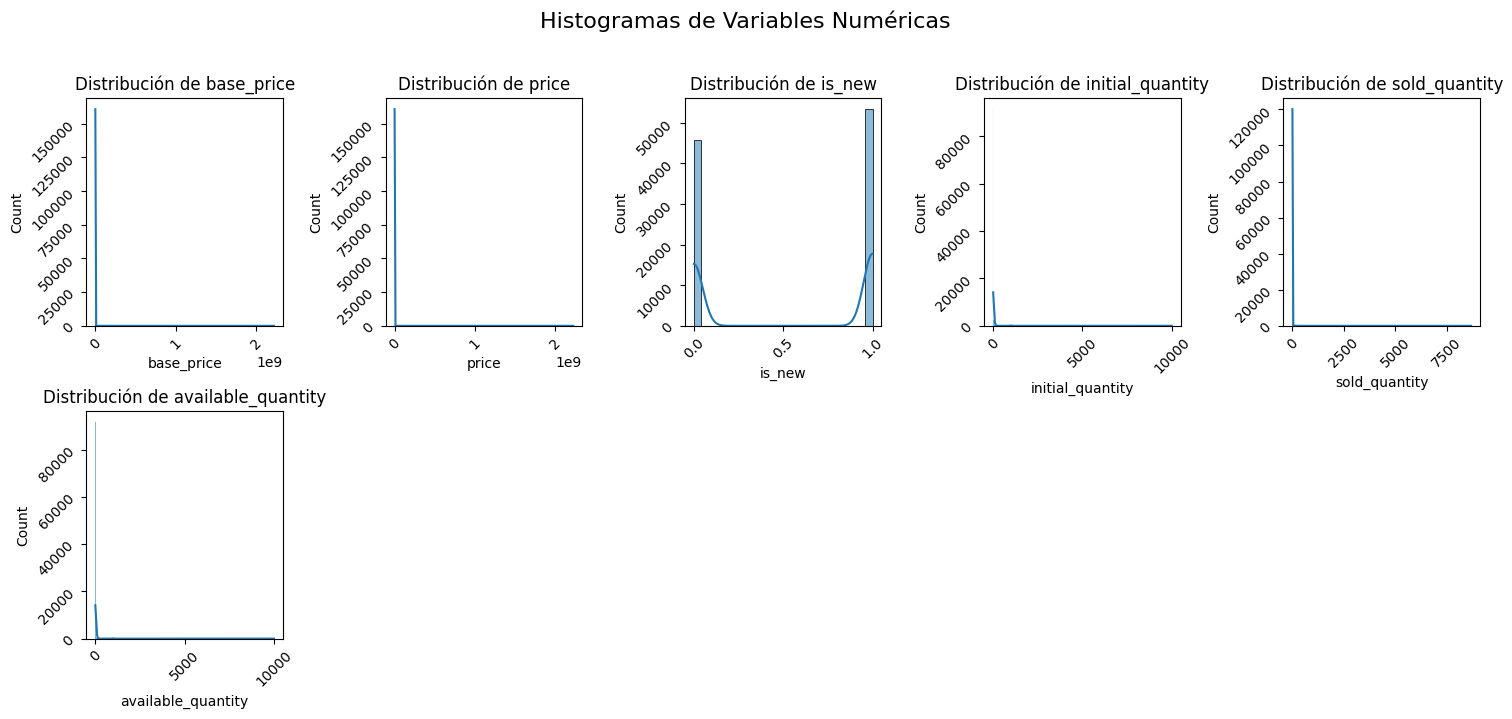

In [77]:
# Generar los histogramas
analyzer.plot_numeric_histograms(figsize=(15, 7))

2025-07-02 17:44:18,661 - INFO - Generados 6 histogramas con transformación logarítmica


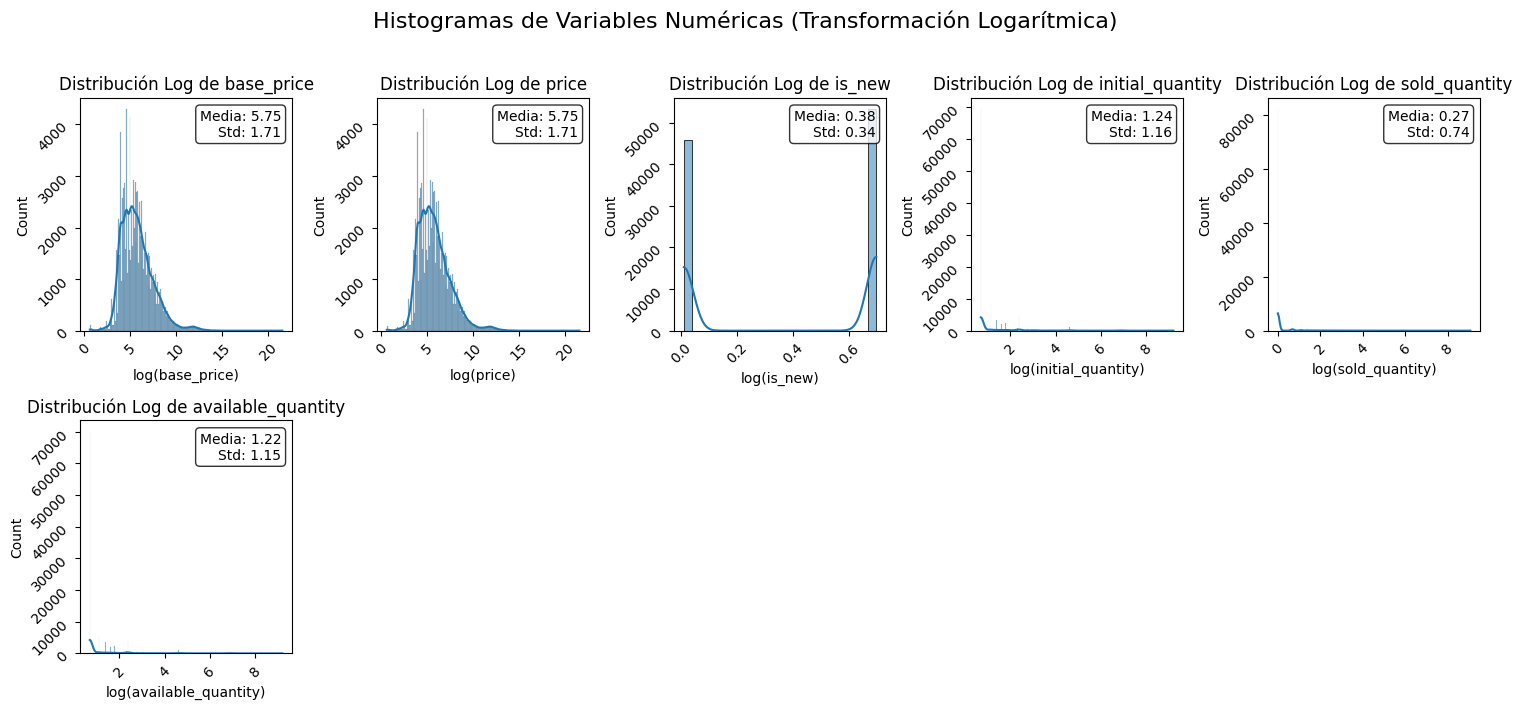

In [78]:
# Generar los histogramas con transformación logarítmica
analyzer.plot_log_transformed_histograms(figsize=(15, 7))


2025-07-02 17:44:31,040 - INFO - Generados 6 boxplots para las variables numéricas


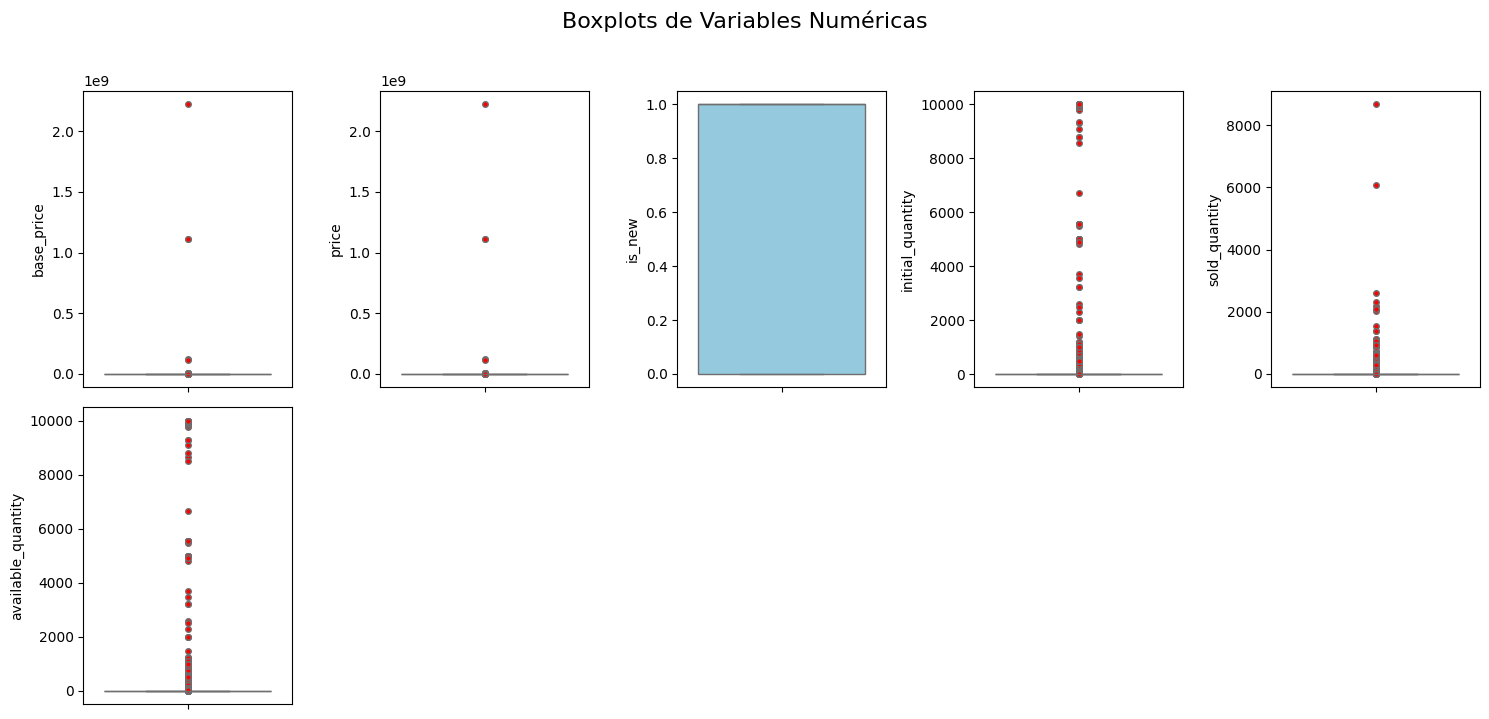

In [79]:
# Generar los boxplots
analyzer.plot_boxplots(figsize=(15, 7))

In [80]:
# Para este ejercicio quitaré los outliers de la columna price, pero aún vale la pena realizar un analísis sobre de ellos. 
analyzer.remove_outliers_by_iqr(columns=['price'])


2025-07-02 17:45:48,976 - INFO - Filas eliminadas por outliers: 14090 (14.21% del total)
2025-07-02 17:45:48,976 - INFO - Columna 'price': 14090 outliers detectados (14.21% del total)


2025-07-02 17:45:53,588 - INFO - Generados 6 boxplots para las variables numéricas


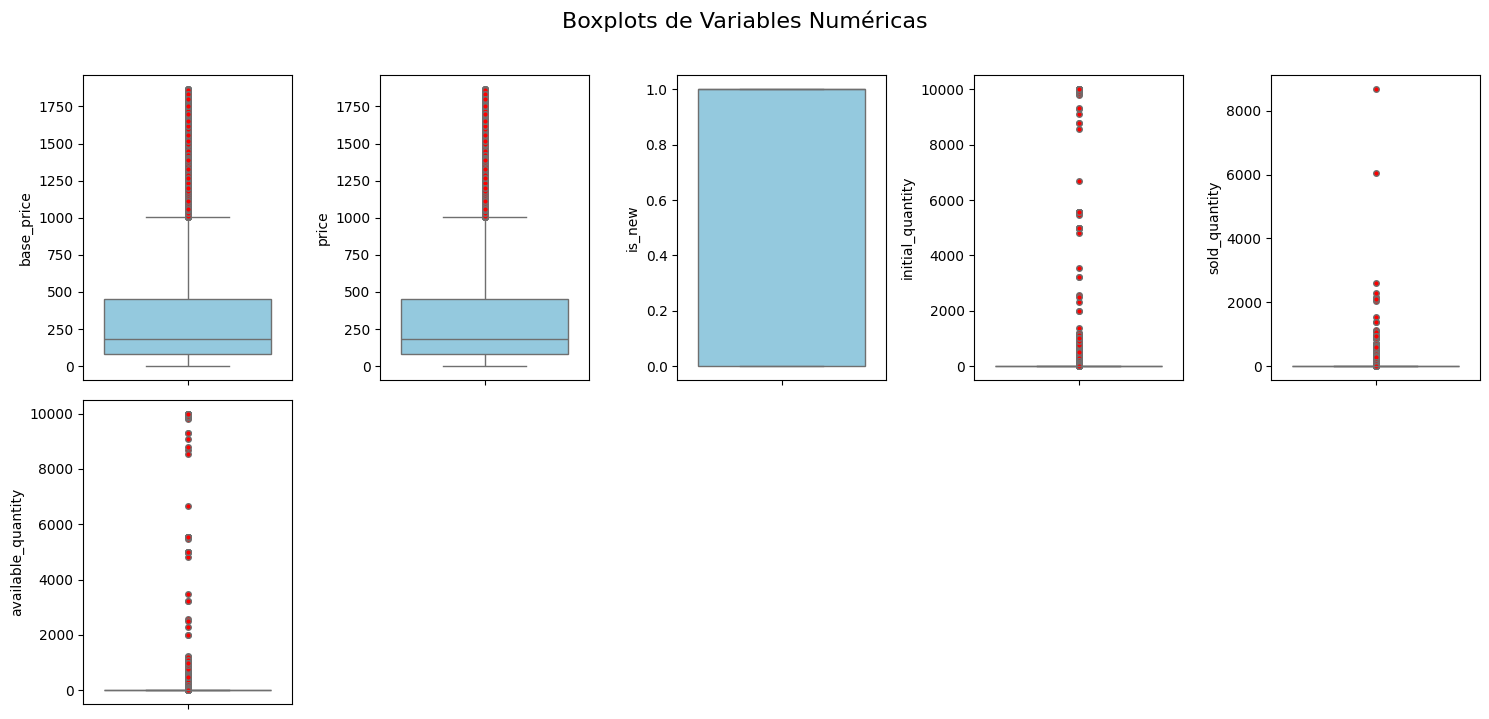

In [81]:
# Generar los boxplots
analyzer.plot_boxplots(figsize=(15, 7))

In [82]:
# Análisis rápdo de las columnas categóricas
categorical_values = analyzer.get_unique_categorical_values()

# Para ver los resultados
categorical_values.reset_index(drop=True).head(100)

2025-07-02 17:46:21,073 - INFO - Análisis de valores únicos completado para 19 columnas no numéricas


,columna,valores_unicos,cantidad_valores
0,seller_country,[Argentina],1
1,buying_mode,"[auction, buy_it_now, classified]",3
2,shipping_admits_pickup,"[False, False, True, True]",4
3,shipping_mode,"[custom, me1, me2, not_specified]",4
4,status,"[active, closed, not_yet_active, paused]",4
5,shipping_is_free,"[False, False, True, True]",4
6,seller_loyalty,"[bronze, free, gold, gold_premium, gold_pro, g...",7
7,tags,"[['dragged_bids_and_visits'], ['dragged_visits...",8
8,seller_province,"[Buenos Aires, Capital Federal, Catamarca, Cha...",24
9,attributes,"[[], [{'value_id': '', 'attribute_group_id': '...",967


In [89]:
# La columna shipping_admits_pickup false y true 2 veces, por un espacio de más
analyzer.data.shipping_admits_pickup.value_counts()

shipping_admits_pickup
True     45161
True     23813
False    10536
False     5550
Name: count, dtype: int64

In [87]:
# Esto mismo para el caso de shipping_is_free
analyzer.data.shipping_is_free.value_counts()

shipping_is_free
False    54400
False    28607
True      1297
True       756
Name: count, dtype: int64

In [90]:
# Se corrigen los espacios en blanco de las columnas categóricas de shipping_is_free y shipping_admits_pickup
analyzer.clean_string_whitespace(columns=['shipping_is_free', 'shipping_admits_pickup'])

2025-07-02 18:03:37,403 - INFO - Limpieza de espacios completada en 2 columnas:
2025-07-02 18:03:37,403 - INFO - Columna 'shipping_is_free':
- Valores únicos originales: 4
- Valores únicos después de limpieza: 2
- Valores unificados por espacios: 2
2025-07-02 18:03:37,403 - INFO - Columna 'shipping_admits_pickup':
- Valores únicos originales: 4
- Valores únicos después de limpieza: 2
- Valores unificados por espacios: 2


In [94]:
# Análisis rápdo de las columnas categóricas
categorical_values = analyzer.get_unique_categorical_values()

# Para ver los resultados
categorical_values.reset_index(drop=True).head(100)

2025-07-02 18:07:05,397 - INFO - Análisis de valores únicos completado para 19 columnas no numéricas


,columna,valores_unicos,cantidad_valores
0,seller_country,[Argentina],1
1,shipping_admits_pickup,"[False, True]",2
2,shipping_is_free,"[False, True]",2
3,buying_mode,"[auction, buy_it_now, classified]",3
4,status,"[active, closed, not_yet_active, paused]",4
5,shipping_mode,"[custom, me1, me2, not_specified]",4
6,seller_loyalty,"[bronze, free, gold, gold_premium, gold_pro, g...",7
7,tags,"[['dragged_bids_and_visits'], ['dragged_visits...",8
8,seller_province,"[Buenos Aires, Capital Federal, Catamarca, Cha...",24
9,attributes,"[[], [{'value_id': '', 'attribute_group_id': '...",967


In [95]:
# Guardo el dataframe limpio

# # Especificando un nombre personalizado
ruta = analyzer.save_processed_dataset(filename='new_items_dataset_procesado_v1.csv')


2025-07-02 18:50:14,387 - INFO - Dataset guardado exitosamente:
- Archivo: data\processed\new_items_dataset_procesado_v1.csv_20250702_185010.csv
- Filas: 85060
- Columnas: 25
- Tamaño en memoria: 166.16 MB
- Metadatos guardados en: data\processed\new_items_dataset_procesado_v1.csv_20250702_185010_metadata.json
